In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ground_sensor_number = "30"
time_interval = 5
file_path = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/192.168.42." + ground_sensor_number + "/" + ground_sensor_number + "_co2d3.txt" #co2
file_path_1 = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/192.168.42." + ground_sensor_number + "/" + ground_sensor_number + "_M1d3.txt" #m1
file_path_2 = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/192.168.42." + ground_sensor_number + "/" + ground_sensor_number + "_M2d3.txt" #m2
file_path_3 = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/192.168.42." + ground_sensor_number + "/" + ground_sensor_number + "_Tempd3.txt" #temp
ground_path = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/ground_1631263545031.csv" #ground
magnitude_path = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/magnitude.txt" #magnitude
phase_path = "/content/drive/MyDrive/crowd_DATA/day_15_data/192.168.0.10/phase.txt" #phase
pcap_path = "/content/drive/MyDrive/crowd_DATA/day_15_data/100920436228132.pcap" #pcap

In [ ]:
#Export
# df_final.to_csv("df_final_" + ground_sensor_number + "_" + str(time_interval) + ".csv")
# df_ml.to_csv("ml_" + ground_sensor_number + "_" + str(time_interval) + ".csv")
#https://drive.google.com/drive/folders/17fs9UN8taS_9K-F-N_9LckxKo2fQhLEG?usp=sharing

# **Sensor Data**

In [ ]:
import numpy as np 
import pandas as pd
import sys
from datetime import datetime, date, time, timedelta, tzinfo

In [ ]:
co2_data = pd.read_csv(file_path, delimiter = "\t\t", header = None)
co2_data.columns = ["time", "co2"]
co2_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,time,co2
0,08:38:52.519909,563
1,08:39:45.307892,510
2,08:42:45.779182,479
3,08:45:46.202510,459
4,08:48:46.575003,460


In [ ]:
m1_data = pd.read_csv(file_path_1, delimiter = "\t\t", header = None)
m1_data.columns = ["time", "m1"]
m1_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,time,m1
0,2021-09-10 08:37:54.321384,0
1,2021-09-10 08:37:55.322570,0
2,2021-09-10 08:37:56.323732,0
3,2021-09-10 08:37:57.324882,0
4,2021-09-10 08:37:58.326044,0


In [ ]:
m2_data = pd.read_csv(file_path_2, delimiter = "\t\t", header = None)
m2_data.columns = ["time", "m2"]
m2_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,time,m2
0,2021-09-10 08:37:54.338787,0
1,2021-09-10 08:37:55.339963,0
2,2021-09-10 08:37:56.341116,0
3,2021-09-10 08:37:57.342258,0
4,2021-09-10 08:37:58.343404,0


In [ ]:
temp_data = pd.read_csv(file_path_3, delimiter="\t\t", header = None)
temp_data.columns = ["time", "humidity", "temperature"]
temp_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,time,humidity,temperature
0,2021-09-10 08:37:55.532438,25.0,99.900002
1,2021-09-10 08:38:01.589216,25.0,99.900002
2,2021-09-10 08:38:05.118574,25.0,99.900002
3,2021-09-10 08:38:08.647960,25.0,99.900002
4,2021-09-10 08:38:12.177329,25.0,99.900002


In [ ]:
def timeSeconds(timeobj):
  t = datetime.combine(date.min, timeobj) - datetime.min
  seconds = int(t.total_seconds())
  return seconds

In [ ]:
columns = ["time_with_date","30", "31", "32", "33", "motion", "weather"]
ground = pd.read_csv(ground_path, names=columns)

ground["time"] = ground['time_with_date'].astype('datetime64[s]')
ground['time'] = pd.to_datetime(ground['time'],format).apply(lambda x: x.time())
ground['seconds'] = ground["time"].apply(lambda x: timeSeconds(x))

ground.head()

,time_with_date,30,31,32,33,motion,weather,time,seconds
0,2021/09/10 08:45:51,1,0,0,1,2,1,08:45:51,31551
1,2021/09/10 08:46:47,0,0,0,1,2,1,08:46:47,31607
2,2021/09/10 08:47:23,0,0,0,2,2,1,08:47:23,31643
3,2021/09/10 08:50:16,0,0,0,3,2,1,08:50:16,31816
4,2021/09/10 08:50:21,0,0,0,2,2,1,08:50:21,31821


In [ ]:
time_range_plot = list(range(ground["seconds"][3], ground["seconds"][9]))

In [ ]:
time_range = co2_data["time"]
print(min(time_range), max(time_range), len(time_range))

08:38:52.519909 10:43:01.981109 43


In [ ]:
time_range = m1_data["time"]
print(min(time_range), max(time_range), len(time_range))

2021-09-10 08:37:39.784244 2021-09-10 10:44:00.050800 7685


In [ ]:
time_range = m2_data["time"]
print(min(time_range), max(time_range), len(time_range))

2021-09-10 08:37:39.784036 2021-09-10 10:44:00.041119 7685


In [ ]:
time_range = temp_data["time"]
print(min(time_range), max(time_range), len(time_range))

2021-09-10 08:37:43.842059  2021-09-10 10:43:37.478876  2058


In [ ]:
co2_data['time_seconds'] = co2_data['time'].astype('datetime64[s]')
co2_data['time_seconds'] = pd.to_datetime(co2_data['time_seconds'],format).apply(lambda x: x.time())

In [ ]:
m1_data['time_seconds'] = m1_data['time'].astype('datetime64[s]')
m1_data['time_seconds'] = pd.to_datetime(m1_data['time_seconds'],format).apply(lambda x: x.time())

In [ ]:
m2_data['time_seconds'] = m2_data['time'].astype('datetime64[s]')
m2_data['time_seconds'] = pd.to_datetime(m2_data['time_seconds'],format).apply(lambda x: x.time())

In [ ]:
temp_data['time_seconds'] = temp_data['time'].astype('datetime64[s]')
temp_data['time_seconds'] = pd.to_datetime(temp_data['time_seconds'],format).apply(lambda x: x.time())

In [ ]:
co2_data['seconds'] = co2_data["time_seconds"].apply(lambda x: timeSeconds(x))
m1_data['seconds'] = m1_data["time_seconds"].apply(lambda x: timeSeconds(x))
m2_data['seconds'] = m2_data["time_seconds"].apply(lambda x: timeSeconds(x))
temp_data['seconds'] = temp_data["time_seconds"].apply(lambda x: timeSeconds(x))

In [ ]:
interval_range = []
j = 0
for i in range(len(m1_data["time_seconds"])):
  interval_range.append(m1_data["time_seconds"][j])
  j += 10
  if(j >= len(m1_data["time_seconds"])):
    break

In [ ]:
co2_array = []
index = 0
count = 0
for i in range(len(m1_data["time_seconds"])):
  if (m1_data["seconds"][i] == co2_data["seconds"][index] and index < len(co2_data["co2"]) - 1):
    co2_array.append(co2_data["co2"][index])
    index += 1
    count += 1
  else:
    co2_array.append(0)

In [ ]:
ground_array = []
index = 0
count = 0
for i in range(len(m1_data["time_seconds"])):
  if (m1_data["seconds"][i] == ground["seconds"][index] and index < len(ground[ground_sensor_number]) - 1):
    ground_array.append(ground[ground_sensor_number][index])
    index += 1
    count += 1
  else:
    ground_array.append(-1)

In [ ]:
temperature_array = []
humidity_array = []
count = 0
temp_index = 0
while(temp_data["seconds"][temp_index] < m1_data["seconds"][0]):
  temp_index += 1
index = temp_index
for i in range(len(m1_data["time_seconds"])):
  if (m1_data["seconds"][i] == temp_data["seconds"][index] and index < len(temp_data["temperature"]) - 1):
    temperature_array.append(temp_data["temperature"][index])
    humidity_array.append(temp_data["humidity"][index])
    index += 1
    count += 1
  else:
    temperature_array.append(0)
    humidity_array.append(0)

In [ ]:
data = {"time_with_date": m1_data["time"], "time": m1_data["time_seconds"], "time_in_seconds": m1_data["seconds"], "co2": co2_array, "m1": m1_data["m1"], "m2": m2_data["m2"], "temperature": temperature_array, "humidity": humidity_array, "ground": ground_array}
df = pd.DataFrame(data)
df

,time_with_date,time,time_in_seconds,co2,m1,m2,temperature,humidity,ground
0,2021-09-10 08:37:54.321384,08:37:54,31074,0,0,0,0.000000,0.0,-1
1,2021-09-10 08:37:55.322570,08:37:55,31075,0,0,0,99.900002,25.0,-1
2,2021-09-10 08:37:56.323732,08:37:56,31076,0,0,0,0.000000,0.0,-1
3,2021-09-10 08:37:57.324882,08:37:57,31077,0,0,0,0.000000,0.0,-1
4,2021-09-10 08:37:58.326044,08:37:58,31078,0,0,0,0.000000,0.0,-1
...,...,...,...,...,...,...,...,...,...
7680,2021-09-10 10:43:56.046014,10:43:56,38636,0,0,0,0.000000,0.0,-1
7681,2021-09-10 10:43:57.047173,10:43:57,38637,0,0,0,0.000000,0.0,-1
7682,2021-09-10 10:43:58.048337,10:43:58,38638,0,0,0,0.000000,0.0,-1
7683,2021-09-10 10:43:59.049625,10:43:59,38639,0,0,0,0.000000,0.0,-1


In [ ]:
index1 = 0
index2 = 0
for i in range(len(df["ground"])):
  if(df["ground"][i] != -1):
    index2 = i
    for j in range(index1, index2):
      df["ground"][j] = df["ground"][i]
    index1 = index2
  else:
    continue
index2 = len(df["ground"])
for i in range(index1, index2):
  df["ground"][i] = df["ground"][index1]

index1 = 0
index2 = 0
for i in range(len(df["co2"])):
  if(df["co2"][i] != 0):
    index2 = i
    for j in range(index1, index2):
      df["co2"][j] = df["co2"][i]
    index1 = index2
  else:
    continue
index2 = len(df["co2"])
for i in range(index1, index2):
  df["co2"][i] = df["co2"][index1]

index1 = 0
index2 = 0
for i in range(len(df["temperature"])):
  if(df["temperature"][i] != 0):
    index2 = i
    for j in range(index1, index2):
      df["temperature"][j] = df["temperature"][i]
    index1 = index2
  else:
    continue
index2 = len(df["temperature"])
for i in range(index1, index2):
  df["temperature"][i] = df["temperature"][index1]

index1 = 0
index2 = 0
for i in range(len(df["humidity"])):
  if(df["humidity"][i] != 0):
    index2 = i
    for j in range(index1, index2):
      df["humidity"][j] = df["humidity"][i]
    index1 = index2
  else:
    continue
index2 = len(df["humidity"])
for i in range(index1, index2):
  df["humidity"][i] = df["humidity"][index1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWa

In [ ]:
df

,time_with_date,time,time_in_seconds,co2,m1,m2,temperature,humidity,ground
0,2021-09-10 08:37:54.321384,08:37:54,31074,563,0,0,99.900002,25.000000,1
1,2021-09-10 08:37:55.322570,08:37:55,31075,563,0,0,99.900002,25.000000,1
2,2021-09-10 08:37:56.323732,08:37:56,31076,563,0,0,99.900002,25.000000,1
3,2021-09-10 08:37:57.324882,08:37:57,31077,563,0,0,99.900002,25.000000,1
4,2021-09-10 08:37:58.326044,08:37:58,31078,563,0,0,99.900002,25.000000,1
...,...,...,...,...,...,...,...,...,...
7680,2021-09-10 10:43:56.046014,10:43:56,38636,477,0,0,99.900002,24.700001,2
7681,2021-09-10 10:43:57.047173,10:43:57,38637,477,0,0,99.900002,24.700001,2
7682,2021-09-10 10:43:58.048337,10:43:58,38638,477,0,0,99.900002,24.700001,2
7683,2021-09-10 10:43:59.049625,10:43:59,38639,477,0,0,99.900002,24.700001,2


In [ ]:
temperature_array = []
humidity_array = []
co2_array = []
time_with_date = []
time = []
time_in_seconds = []
m1 = []
m2 = []
ground_value = []
i = 0
temp_m1 = []
temp_m2 = []
for i in range(len(df["temperature"])):
  if(i%time_interval == 0 and i != 0):
      temperature_array.append(df["temperature"][i])
      humidity_array.append(df["humidity"][i])
      time_with_date.append(df["time_with_date"][i])
      time.append(df["time"][i])
      time_in_seconds.append(df["time_in_seconds"][i])
      co2_array.append(df["co2"][i])
      ground_value.append(df["ground"][i])
      m1.append(temp_m1)
      m2.append(temp_m2)
      temp_m1 = []
      temp_m2 = []
      temp_m1.append(df["m1"][i])
      temp_m2.append(df["m2"][i])
  else:
      temp_m1.append(df["m1"][i])
      temp_m2.append(df["m2"][i])

In [ ]:
print(len(co2_array), len(m1), len(m2), len(temperature_array), len(humidity_array), len(ground_value))

1536 1536 1536 1536 1536 1536


In [ ]:
columns_m1_10 = ["m1_1", "m1_2", "m1_3", "m1_4", "m1_5", "m1_6", "m1_7", "m1_8", "m1_9", "m1_10"]
columns_m1_5 = ["m1_1", "m1_2", "m1_3", "m1_4", "m1_5"]
if (time_interval == 5):
  columns_m1_time = columns_m1_5
elif (time_interval == 10):
  columns_m1_time = columns_m1_10
df_m1 = pd.DataFrame(columns=columns_m1_time)
for i in range(len(m1)):
  df_m1.loc[len(df_m1.index)] = m1[i]
df_m1["time_in_seconds"] = time_in_seconds

In [ ]:
columns_m2_10 = ["m2_1", "m2_2", "m2_3", "m2_4", "m2_5", "m2_6", "m2_7", "m2_8", "m2_9", "m2_10"]
columns_m2_5 = ["m2_1", "m2_2", "m2_3", "m2_4", "m2_5"]
if (time_interval == 5):
  columns_m2_time = columns_m2_5
elif (time_interval == 10):
  columns_m2_time = columns_m2_10
df_m2 = pd.DataFrame(columns=columns_m2_time)
for i in range(len(m2)):
  df_m2.loc[len(df_m2.index)] = m2[i]
df_m2["time_in_seconds"] = time_in_seconds

In [ ]:
df_m2

,m2_1,m2_2,m2_3,m2_4,m2_5,time_in_seconds
0,0,0,0,0,0,31079
1,0,0,0,0,0,31084
2,0,0,0,0,0,31089
3,0,0,0,0,0,31094
4,0,0,0,0,0,31099
...,...,...,...,...,...,...
1531,0,0,0,0,0,38616
1532,0,0,0,0,0,38621
1533,0,0,0,0,0,38626
1534,0,0,0,0,0,38631


In [ ]:
df_dict = {"time_with_date": time_with_date, "time": time, "time_in_seconds": time_in_seconds, "co2": co2_array, "temperature": temperature_array, "humidity": humidity_array, "ground": ground_value}
df_time = pd.DataFrame(df_dict)
df_time

,time_with_date,time,time_in_seconds,co2,temperature,humidity,ground
0,2021-09-10 08:37:59.327256,08:37:59,31079,563,99.900002,25.000000,1
1,2021-09-10 08:38:04.333334,08:38:04,31084,563,99.900002,25.000000,1
2,2021-09-10 08:38:09.339464,08:38:09,31089,563,99.900002,25.000000,1
3,2021-09-10 08:38:14.345501,08:38:14,31094,563,99.900002,25.000000,1
4,2021-09-10 08:38:19.350738,08:38:19,31099,563,99.900002,24.900000,1
...,...,...,...,...,...,...,...
1531,2021-09-10 10:43:36.022894,10:43:36,38616,477,99.900002,24.700001,2
1532,2021-09-10 10:43:41.028655,10:43:41,38621,477,99.900002,24.700001,2
1533,2021-09-10 10:43:46.034516,10:43:46,38626,477,99.900002,24.700001,2
1534,2021-09-10 10:43:51.040210,10:43:51,38631,477,99.900002,24.700001,2


In [ ]:
df_time = pd.merge(df_time, df_m1, on="time_in_seconds")
df_time = pd.merge(df_time, df_m2, on="time_in_seconds")
df_time

,time_with_date,time,time_in_seconds,co2,temperature,humidity,ground,m1_1,m1_2,m1_3,m1_4,m1_5,m2_1,m2_2,m2_3,m2_4,m2_5
0,2021-09-10 08:37:59.327256,08:37:59,31079,563,99.900002,25.000000,1,0,0,0,0,0,0,0,0,0,0
1,2021-09-10 08:38:04.333334,08:38:04,31084,563,99.900002,25.000000,1,0,0,0,0,0,0,0,0,0,0
2,2021-09-10 08:38:09.339464,08:38:09,31089,563,99.900002,25.000000,1,0,0,0,0,0,0,0,0,0,0
3,2021-09-10 08:38:14.345501,08:38:14,31094,563,99.900002,25.000000,1,0,0,0,0,0,0,0,0,0,0
4,2021-09-10 08:38:19.350738,08:38:19,31099,563,99.900002,24.900000,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-09-10 10:43:36.022894,10:43:36,38616,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0
1532,2021-09-10 10:43:41.028655,10:43:41,38621,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0
1533,2021-09-10 10:43:46.034516,10:43:46,38626,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0
1534,2021-09-10 10:43:51.040210,10:43:51,38631,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0


# **Ground Truth**

In [ ]:
columns = ["time_with_date","30", "31", "32", "33", "motion", "weather"]
ground = pd.read_csv(ground_path, names=columns)

In [ ]:
ground["time"] = ground['time_with_date'].astype('datetime64[s]')
ground['time'] = pd.to_datetime(ground['time'],format).apply(lambda x: x.time())
ground['seconds'] = ground["time"].apply(lambda x: timeSeconds(x))

In [ ]:
ground

,time_with_date,30,31,32,33,motion,weather,time,seconds
0,2021/09/10 08:45:51,1,0,0,1,2,1,08:45:51,31551
1,2021/09/10 08:46:47,0,0,0,1,2,1,08:46:47,31607
2,2021/09/10 08:47:23,0,0,0,2,2,1,08:47:23,31643
3,2021/09/10 08:50:16,0,0,0,3,2,1,08:50:16,31816
4,2021/09/10 08:50:21,0,0,0,2,2,1,08:50:21,31821
5,2021/09/10 08:58:00,0,0,0,1,2,1,08:58:00,32280
6,2021/09/10 08:58:14,0,0,0,0,2,1,08:58:14,32294
7,2021/09/10 09:00:09,0,0,0,0,2,1,09:00:09,32409
8,2021/09/10 09:09:01,0,0,0,2,2,1,09:09:01,32941
9,2021/09/10 09:26:24,0,0,0,1,2,1,09:26:24,33984


# **Sensor Plots**

In [ ]:
index_start = 0
index_end = 0
for i in range(len(df["time_in_seconds"])):
  if df["time_in_seconds"][i] == time_range_plot[0]:
    index_start = i
  if df["time_in_seconds"][i] == time_range_plot[len(time_range_plot)-1]:
    index_end = i
    break

In [ ]:
print(index_start, index_end)

869 3033


In [ ]:
temperature_array_plot = list(df["temperature"])[index_start-1:index_end+1]
co2_array_plot = list(df["co2"])[index_start-1:index_end+1]
m1_array_plot = list(df["m1"])[index_start-1:index_end+1]
m2_array_plot = list(df["m2"])[index_start-1:index_end+1]
print(len(time_range_plot[:-2]))
print(len(temperature_array_plot))

2166
2166


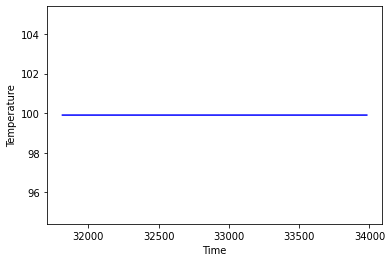

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_range_plot[:-2], temperature_array_plot, color="blue")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

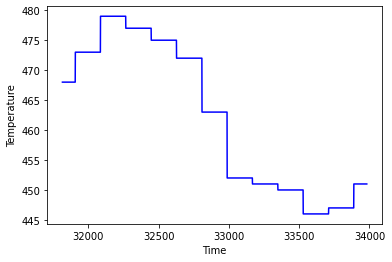

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_range_plot[:-2], co2_array_plot, color="blue")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

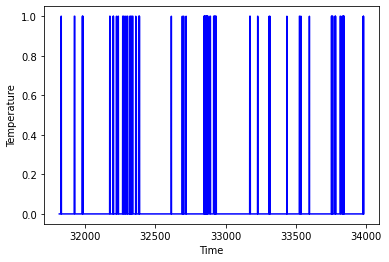

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_range_plot[:-2], m1_array_plot, color="blue")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

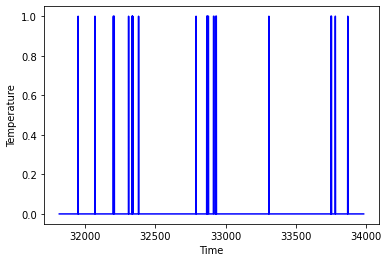

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_range_plot[:-2], m2_array_plot, color="blue")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

# **PCAP to df**

In [ ]:
import socket
!pip install dpkt
import dpkt

ip_src = []
ip_dst = []
timestamp = []


def _inet_to_str(inet):
    try:
        return socket.inet_ntop(socket.AF_INET, inet)
    except ValueError:
        return socket.inet_ntop(socket.AF_INET6, inet)


def arp(pcap_path):
    def _is_arp(packet):
        return True

    with open(pcap_path, 'rb') as f:
        pcap = dpkt.pcap.Reader(f)
        for ts, buf in pcap:
            eth = dpkt.ethernet.Ethernet(buf)
            if not isinstance(eth.data, dpkt.ip.IP):
                continue

            if not _is_arp(eth):
                continue
            ip = eth.data
            # write to file instead of printing
            ip_src.append(_inet_to_str(ip.src))
            ip_dst.append(_inet_to_str(ip.dst))
            utc_time = datetime.utcfromtimestamp(ts)
            timestamp.append(utc_time)
            # print('{},{},{}'.format(_inet_to_str(ip.src), _inet_to_str(ip.dst),
            #                         datetime.utcfromtimestamp(ts).strftime("%m/%d/%Y, %H:%M:%S")))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 181 kB 9.6 MB/s 


In [ ]:
arp(pcap_path)

In [ ]:
import datetime
from datetime import timedelta
timestamps = []
for i in timestamp:
  j = i + datetime.timedelta(hours=7, minutes=30)
  timestamps.append(j)
from datetime import datetime

In [ ]:
df_pcap = pd.DataFrame(data=list(zip(timestamps, ip_src, ip_dst)), columns=["timestamp", "source", "destination"])
df_pcap

,timestamp,source,destination
0,2020-09-10 08:41:06.182175,10.10.10.10,255.255.255.255
1,2020-09-10 08:41:06.186073,10.10.10.10,255.255.255.255
2,2020-09-10 08:41:06.187732,10.10.10.10,255.255.255.255
3,2020-09-10 08:41:06.188294,10.10.10.10,255.255.255.255
4,2020-09-10 08:41:07.154137,10.10.10.10,255.255.255.255
...,...,...,...
70084,2020-09-10 10:46:00.011284,10.10.10.10,255.255.255.255
70085,2020-09-10 10:46:00.012754,10.10.10.10,255.255.255.255
70086,2020-09-10 10:46:00.013449,10.10.10.10,255.255.255.255
70087,2020-09-10 10:46:00.013924,10.10.10.10,255.255.255.255


In [ ]:
df_pcap['time_seconds'] = df_pcap['timestamp'].astype('datetime64[s]')
df_pcap['time_seconds'] = pd.to_datetime(df_pcap['time_seconds'],format).apply(lambda x: x.time())
df_pcap['seconds'] = df_pcap["time_seconds"].apply(lambda x: timeSeconds(x))

In [ ]:
df_pcap

,timestamp,source,destination,time_seconds,seconds
0,2020-09-10 08:41:06.182175,10.10.10.10,255.255.255.255,08:41:06,31266
1,2020-09-10 08:41:06.186073,10.10.10.10,255.255.255.255,08:41:06,31266
2,2020-09-10 08:41:06.187732,10.10.10.10,255.255.255.255,08:41:06,31266
3,2020-09-10 08:41:06.188294,10.10.10.10,255.255.255.255,08:41:06,31266
4,2020-09-10 08:41:07.154137,10.10.10.10,255.255.255.255,08:41:07,31267
...,...,...,...,...,...
70084,2020-09-10 10:46:00.011284,10.10.10.10,255.255.255.255,10:46:00,38760
70085,2020-09-10 10:46:00.012754,10.10.10.10,255.255.255.255,10:46:00,38760
70086,2020-09-10 10:46:00.013449,10.10.10.10,255.255.255.255,10:46:00,38760
70087,2020-09-10 10:46:00.013924,10.10.10.10,255.255.255.255,10:46:00,38760


In [ ]:
df_mag = pd.read_csv(magnitude_path, header=None)
df_mag.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,6468.2,8271.6,5524.3,3694.3,462.35,462.03,491.55,511.71,534.58,539.94,...,483.15,466.57,440.88,419.24,399.15,376.58,349.86,3167.6,0.0,0
1,6468.2,8271.6,5524.3,3694.3,431.00,459.50,494.22,510.09,524.76,531.40,...,471.76,453.99,436.59,424.83,406.27,374.17,346.54,3167.6,0.0,0
2,6468.2,8271.6,5524.3,3694.3,455.63,479.18,491.24,516.90,523.70,544.31,...,476.01,448.37,430.27,421.41,410.81,398.33,372.51,3167.6,0.0,0
3,6468.2,8271.6,5524.3,3694.3,441.28,464.61,492.35,511.50,525.08,535.42,...,477.22,457.44,437.54,420.00,403.94,376.83,358.40,3167.6,0.0,0
4,6468.2,8271.6,5524.3,3694.3,299.28,312.08,325.26,332.35,322.69,323.36,...,523.64,503.75,519.14,504.37,481.43,469.14,453.31,3167.6,0.0,0


In [ ]:
df_phase = pd.read_csv(phase_path, header=None)
df_phase.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,18.637,150.23,68.251,33.63,160.940,-165.840,-136.240,-109.280,-87.3200,-66.9960,...,-178.58,-160.210,-141.080,-118.340,-91.5790,-62.8230,-30.964,-107.68,0.0,0
1,18.637,150.23,68.251,33.63,-89.867,-65.164,-42.048,-18.044,4.7002,25.4080,...,-103.36,-83.423,-62.144,-39.460,-14.6860,9.5378,35.249,-107.68,0.0,0
2,18.637,150.23,68.251,33.63,-156.870,-118.280,-80.154,-44.765,-14.9380,13.1680,...,-110.80,-85.523,-57.529,-28.025,6.7098,43.0670,82.131,-107.68,0.0,0
3,18.637,150.23,68.251,33.63,-123.260,-98.915,-76.133,-51.987,-29.0550,-8.1604,...,-117.32,-97.032,-76.250,-53.130,-27.8970,-3.8040,22.128,-107.68,0.0,0
4,18.637,150.23,68.251,33.63,-124.380,-96.624,-69.671,-44.512,-20.1200,6.9272,...,-121.81,-103.900,-88.675,-68.726,-42.1380,-15.0730,14.435,-107.68,0.0,0


In [ ]:
nested_mag = []
for i in range(len(df_mag.iloc[:,0])):
  array = []
  for j in df_mag.iloc[i,:]:
    array.append(j)
  nested_mag.append(array)

In [ ]:
nested_phase = []
for i in range(len(df_phase.iloc[:,0])):
  array = []
  for j in df_phase.iloc[i,:]:
    array.append(j)
  nested_phase.append(array)

In [ ]:
len(nested_mag)

70089

In [ ]:
df_pcap["magnitude"] = nested_mag
df_pcap["phase"] = nested_phase

In [ ]:
df_pcap

,timestamp,source,destination,time_seconds,seconds,magnitude,phase
0,2020-09-10 08:41:06.182175,10.10.10.10,255.255.255.255,08:41:06,31266,"[6468.2, 8271.6, 5524.3, 3694.3, 462.35, 462.0...","[18.637, 150.23, 68.251, 33.63, 160.94, -165.8..."
1,2020-09-10 08:41:06.186073,10.10.10.10,255.255.255.255,08:41:06,31266,"[6468.2, 8271.6, 5524.3, 3694.3, 431.0, 459.5,...","[18.637, 150.23, 68.251, 33.63, -89.867, -65.1..."
2,2020-09-10 08:41:06.187732,10.10.10.10,255.255.255.255,08:41:06,31266,"[6468.2, 8271.6, 5524.3, 3694.3, 455.63, 479.1...","[18.637, 150.23, 68.251, 33.63, -156.87, -118...."
3,2020-09-10 08:41:06.188294,10.10.10.10,255.255.255.255,08:41:06,31266,"[6468.2, 8271.6, 5524.3, 3694.3, 441.28, 464.6...","[18.637, 150.23, 68.251, 33.63, -123.26, -98.9..."
4,2020-09-10 08:41:07.154137,10.10.10.10,255.255.255.255,08:41:07,31267,"[6468.2, 8271.6, 5524.3, 3694.3, 299.28, 312.0...","[18.637, 150.23, 68.251, 33.63, -124.38, -96.6..."
...,...,...,...,...,...,...,...
70084,2020-09-10 10:46:00.011284,10.10.10.10,255.255.255.255,10:46:00,38760,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70085,2020-09-10 10:46:00.012754,10.10.10.10,255.255.255.255,10:46:00,38760,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70086,2020-09-10 10:46:00.013449,10.10.10.10,255.255.255.255,10:46:00,38760,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70087,2020-09-10 10:46:00.013924,10.10.10.10,255.255.255.255,10:46:00,38760,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_mag=df_pcap.copy()
df_mag.drop(['source', 'destination', 'seconds', 'phase'], axis=1, inplace=True)
df_phase=df_pcap.copy()
df_phase.drop(['source', 'destination', 'seconds', 'magnitude'], axis=1, inplace=True)
df_mag

,timestamp,time_seconds,magnitude
0,2020-09-10 08:41:06.182175,08:41:06,"[6468.2, 8271.6, 5524.3, 3694.3, 462.35, 462.0..."
1,2020-09-10 08:41:06.186073,08:41:06,"[6468.2, 8271.6, 5524.3, 3694.3, 431.0, 459.5,..."
2,2020-09-10 08:41:06.187732,08:41:06,"[6468.2, 8271.6, 5524.3, 3694.3, 455.63, 479.1..."
3,2020-09-10 08:41:06.188294,08:41:06,"[6468.2, 8271.6, 5524.3, 3694.3, 441.28, 464.6..."
4,2020-09-10 08:41:07.154137,08:41:07,"[6468.2, 8271.6, 5524.3, 3694.3, 299.28, 312.0..."
...,...,...,...
70084,2020-09-10 10:46:00.011284,10:46:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70085,2020-09-10 10:46:00.012754,10:46:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70086,2020-09-10 10:46:00.013449,10:46:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70087,2020-09-10 10:46:00.013924,10:46:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_mag.to_csv("/content/drive/MyDrive/df_magnitude_day_15.csv")
df_phase.to_csv("/content/drive/MyDrive/df_phase_day_15.csv")

In [ ]:
indexes = []
indexed_time = []
current_index = 0
current_time = 0
for i in range(len(df_pcap["seconds"])):
  if df_pcap["seconds"][i] != current_time:
    indexes.append(i)
    indexed_time.append(df_pcap["seconds"][i])
    current_index = i
    current_time = df_pcap["seconds"][i]
indexed_magnitude = []
indexed_phase = []
for i in indexes:
  indexed_magnitude.append(df_pcap["magnitude"][i])
  indexed_phase.append(df_pcap["phase"][i]) 

In [ ]:
data = {"time_in_seconds": indexed_time, "magnitude": indexed_magnitude, "phase": indexed_phase}
df_merge = pd.DataFrame(data)
df_merge

,time_in_seconds,magnitude,phase
0,31266,"[6468.2, 8271.6, 5524.3, 3694.3, 462.35, 462.0...","[18.637, 150.23, 68.251, 33.63, 160.94, -165.8..."
1,31267,"[6468.2, 8271.6, 5524.3, 3694.3, 299.28, 312.0...","[18.637, 150.23, 68.251, 33.63, -124.38, -96.6..."
2,31268,"[6468.2, 8271.6, 5524.3, 3694.3, 491.33, 502.3...","[18.637, 150.23, 68.251, 33.63, 92.1, 129.43, ..."
3,31269,"[6468.2, 8271.6, 5524.3, 3694.3, 422.16, 471.5...","[18.637, 150.23, 68.251, 33.63, -140.77, -95.9..."
4,31270,"[6468.2, 8271.6, 5524.3, 3694.3, 462.3, 483.16...","[18.637, 150.23, 68.251, 33.63, 114.4, 145.88,..."
...,...,...,...
7476,38742,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7477,38743,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7478,38758,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7479,38759,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_final = pd.merge(df_time, df_merge, on="time_in_seconds")
df_final

,time_with_date,time,time_in_seconds,co2,temperature,humidity,ground,m1_1,m1_2,m1_3,m1_4,m1_5,m2_1,m2_2,m2_3,m2_4,m2_5,magnitude,phase
0,2021-09-10 08:41:07.021794,08:41:07,31267,479,99.900002,24.700001,1,0,0,0,0,0,0,0,0,0,0,"[6468.2, 8271.6, 5524.3, 3694.3, 299.28, 312.0...","[18.637, 150.23, 68.251, 33.63, -124.38, -96.6..."
1,2021-09-10 08:41:12.027983,08:41:12,31272,479,99.900002,24.700001,1,0,0,0,0,0,0,0,0,0,0,"[6468.2, 8271.6, 5524.3, 3694.3, 344.4, 372.51...","[18.637, 150.23, 68.251, 33.63, -44.177, -7.86..."
2,2021-09-10 08:41:17.034174,08:41:17,31277,479,99.900002,24.700001,1,0,0,0,0,0,0,1,1,1,0,"[6468.2, 8271.6, 5524.3, 3694.3, 505.4, 542.09...","[18.637, 150.23, 68.251, 33.63, 11.643, 76.451..."
3,2021-09-10 08:41:22.040325,08:41:22,31282,479,99.900002,24.700001,1,0,0,0,0,0,0,0,0,0,0,"[6468.2, 8271.6, 5524.3, 3694.3, 470.37, 488.9...","[18.637, 150.23, 68.251, 33.63, -158.29, -128...."
4,2021-09-10 08:41:27.046530,08:41:27,31287,479,99.900002,24.700001,1,0,0,0,0,0,0,0,0,0,0,"[6468.2, 8271.6, 5524.3, 3694.3, 436.14, 432.4...","[18.637, 150.23, 68.251, 33.63, -139.37, -105...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2021-09-10 10:43:36.022894,10:43:36,38616,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1469,2021-09-10 10:43:41.028655,10:43:41,38621,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1470,2021-09-10 10:43:46.034516,10:43:46,38626,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1471,2021-09-10 10:43:51.040210,10:43:51,38631,477,99.900002,24.700001,2,0,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
columns_magnitude = []
columns_phase = []
for i in range(64):
  columns_magnitude.append("magnitude_" + str(i))
  columns_phase.append("phase_" + str(i))

In [ ]:
df_mag = pd.DataFrame(columns=columns_magnitude)
for i in range(len(df_final["magnitude"])):
  df_mag.loc[len(df_mag.index)] = df_final["magnitude"][i]
df_mag["time_in_seconds"] = df_final["time_in_seconds"]

df_phase = pd.DataFrame(columns=columns_phase)
for i in range(len(df_final["phase"])):
  df_phase.loc[len(df_phase.index)] = df_final["phase"][i]
df_phase["time_in_seconds"] = df_final["time_in_seconds"]

In [ ]:
df_final = pd.merge(df_final, df_mag, on="time_in_seconds")
df_final = pd.merge(df_final, df_phase, on="time_in_seconds")
df_final.drop('magnitude', axis=1, inplace=True)
df_final.drop('phase', axis=1, inplace=True)
df_final

,time_with_date,time,time_in_seconds,co2,temperature,humidity,ground,m1_1,m1_2,m1_3,...,phase_54,phase_55,phase_56,phase_57,phase_58,phase_59,phase_60,phase_61,phase_62,phase_63
0,2021-09-10 08:41:07.021794,08:41:07,31267,479,99.900002,24.700001,1,0,0,0,...,-121.81,-103.90,-88.675,-68.726,-42.13800,-15.073,14.43500,-107.68,0.0,0.0
1,2021-09-10 08:41:12.027983,08:41:12,31272,479,99.900002,24.700001,1,0,0,0,...,164.01,-175.21,-153.360,-127.250,-98.80200,-67.061,-31.07400,-107.68,0.0,0.0
2,2021-09-10 08:41:17.034174,08:41:17,31277,479,99.900002,24.700001,1,0,0,0,...,152.14,-159.18,-109.160,-56.354,0.40292,60.422,124.77000,-107.68,0.0,0.0
3,2021-09-10 08:41:22.040325,08:41:22,31282,479,99.900002,24.700001,1,0,0,0,...,130.87,146.61,163.730,-177.220,-154.65000,-128.360,-98.04900,-107.68,0.0,0.0
4,2021-09-10 08:41:27.046530,08:41:27,31287,479,99.900002,24.700001,1,0,0,0,...,-142.31,-124.03,-105.020,-83.378,-58.33000,-30.753,-0.25093,-107.68,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2021-09-10 10:43:36.022894,10:43:36,38616,477,99.900002,24.700001,2,0,0,0,...,0.00,0.00,0.000,0.000,0.00000,0.000,0.00000,0.00,0.0,0.0
1469,2021-09-10 10:43:41.028655,10:43:41,38621,477,99.900002,24.700001,2,0,0,0,...,0.00,0.00,0.000,0.000,0.00000,0.000,0.00000,0.00,0.0,0.0
1470,2021-09-10 10:43:46.034516,10:43:46,38626,477,99.900002,24.700001,2,0,0,0,...,0.00,0.00,0.000,0.000,0.00000,0.000,0.00000,0.00,0.0,0.0
1471,2021-09-10 10:43:51.040210,10:43:51,38631,477,99.900002,24.700001,2,0,0,0,...,0.00,0.00,0.000,0.000,0.00000,0.000,0.00000,0.00,0.0,0.0


In [ ]:
index = 0
end = len(df_final["magnitude_1"])
for i in range(len(df_final["magnitude_1"])):
  if (df_final["magnitude_1"][len(df_final["magnitude_1"]) - i - 1] != 0):
    index = i
    break

for i in range(end - index, end):
  df_final.drop(i, axis=0, inplace=True)
df_final

In [ ]:
df_final.to_csv("/content/drive/MyDrive/df_final_30_day_10.csv")

# **Image**

In [ ]:
time_interval_start = ground["seconds"][0]
time_interval_end = ground["seconds"][len(ground["seconds"]) - 1]
image_pcap_mag = []
image_pcap_phase = []
for i in range(time_interval_start, time_interval_end + 1):
  for j in range(len(df_pcap["seconds"])):
    if(i<df_pcap["seconds"][j]):
      break
    elif(i == df_pcap["seconds"][j] and i != 0):
      image_pcap_mag.append(df_pcap["magnitude"][j])
      image_pcap_phase.append(df_pcap["phase"][j])

subcarrier = [x for x in range(-32,32)]

KeyboardInterrupt: ignored

In [ ]:
time_interval_start = ground["seconds"][0]
time_interval_end = ground["seconds"][len(ground["seconds"]) - 1]
image_pcap_mag = []
image_pcap_phase = []
for i in range(time_interval_start, time_interval_end + 1):
  for j in range(len(df_pcap["seconds"])):
    if(i<df_pcap["seconds"][j]):
      break
    elif(i == df_pcap["seconds"][j] and i == 0):
      image_pcap_mag.append(df_pcap["magnitude"][j])
      image_pcap_phase.append(df_pcap["phase"][j])

subcarrier = [x for x in range(-32,32)]

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(image_pcap_mag)):
  plt.plot(subcarrier, image_pcap_mag[i], color="blue")
plt.xlabel('subcarrier index')
plt.ylabel('magnitude')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(image_pcap_mag)):
  plt.plot(subcarrier, image_pcap_mag[i], color="blue")
plt.xlabel('subcarrier index')
plt.ylabel('magnitude')
plt.show()

In [ ]:
for i in range(len(image_pcap_phase)):
  plt.plot(subcarrier, image_pcap_phase[i], color="red")
plt.xlabel('subcarrier index')
plt.ylabel('phase')
plt.show()

# **Machine Learning Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_columns = df_final.columns.delete(6)
X_columns = X_columns.delete(0)
X_columns = X_columns.delete(0)
X_columns = X_columns.delete(0)
X_columns = list(X_columns)

In [ ]:
X = df_final[X_columns]
y = df_final["ground"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.24553288640202703
MSE: 0.13892569493603063
RMSE: 0.3727273734729321
R2 Square 0.11745115374744375
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.24937352594339623
MSE: 0.14736870576750558
RMSE: 0.3838863188074115
R2 Square 0.5203428587209407
__________________________________


In [ ]:
linreg = [round(i) for i in y_pred]
match = 0
for i in range(len(y_test)):
  if(list(y_test)[i] == linreg[i]):
    match += 1
accuracy = (match/len(y_test))*100
print("Accuracy: ", accuracy)

Accuracy:  85.13513513513513


**Random Forest Regressor**

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, criterion='mse')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.24520270270270275
MSE: 0.14569527027027027
RMSE: 0.38170049812683016
R2 Square 0.07444628770301642
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09186415094339624
MSE: 0.02710067924528302
RMSE: 0.1646228393792399
R2 Square 0.911792437439052
__________________________________


In [ ]:
rf = [round(i) for i in y_pred]
match = 0
for i in range(len(y_test)):
  if(list(y_test)[i] == rf[i]):
    match += 1
accuracy = (match/len(y_test))*100
print("Accuracy: ", accuracy)

Accuracy:  83.78378378378379


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.1554054054054054
MSE: 0.20945945945945946
RMSE: 0.45766741140205675
R2 Square -0.330626450116009
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12603773584905661
MSE: 0.1728301886792453
RMSE: 0.415728503568429
R2 Square 0.43747056882353164
__________________________________


In [ ]:
logreg = [round(i) for i in y_pred]
match = 0
for i in range(len(y_test)):
  if(list(y_test)[i] == logreg[i]):
    match += 1
accuracy = (match/len(y_test))*100
print("Accuracy: ", accuracy)

Accuracy:  87.16216216216216


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train) 

lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lm.predict(poly.fit_transform(X_test))

In [ ]:
test_pred = lm.predict(poly.fit_transform(X_test))
train_pred = lm.predict(poly.fit_transform(X_train))

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.6457389339024434
MSE: 0.8512396421518961
RMSE: 0.9226264911392346
R2 Square -4.4076430167329255
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.2735626358458e-15
MSE: 3.1599842223915754e-29
RMSE: 5.6213736954516515e-15
R2 Square 1.0
__________________________________


In [ ]:
pr = [round(i) for i in y_pred]
match = 0
for i in range(len(y_test)):
  if(list(y_test)[i] == pr[i]):
    match += 1
accuracy = (match/len(y_test))*100
print("Accuracy: ", accuracy)

Accuracy:  53.37837837837838


In [ ]:
data = {"linreg_" + ground_sensor_number: linreg, "rf_" + ground_sensor_number: rf, "logreg_" + ground_sensor_number: logreg, "pr_" + ground_sensor_number: pr, "ground_" + ground_sensor_number: y_test}
df_ml = pd.DataFrame(data)
df_ml

,linreg_30,rf_30,logreg_30,pr_30,ground_30
852,0,0,0,1,0
184,0,0,0,0,0
1261,0,1,0,1,0
67,0,0,0,-1,0
220,0,0,0,0,0
...,...,...,...,...,...
43,0,0,0,0,1
1346,0,0,0,0,1
1052,0,1,0,4,0
332,0,0,0,1,0


In [ ]:
# df_ml.to_csv("ml_31_10.csv")

# **Ground Values matching**

In [ ]:
def persistanceScore(y_test,y_pred):
  count = 0
  y_test = list(y_test)
  y_pred = y_pred
  prev_test = y_test[0]
  prev_pred = y_pred[0]
  for i in range(len(y_test)):
    if(y_test[i] == y_pred[i]):
      count += 1
      prev_test = y_test[i]
      prev_pred = y_pred[i]
    else:
      if(y_test[i] > prev_test and y_pred[i] > prev_pred and i != 0):
        count += 1
        prev_test = y_test[i]
        prev_pred = y_pred[i]
      elif(y_test[i] < prev_test and y_pred[i] < prev_pred and i != 0):
        count += 1
        prev_test = y_test[i]
        prev_pred = y_pred[i]
  return (count * 100)/len(y_test)

In [ ]:
print("Persistance Score for Linear Regression: ", persistanceScore(y_test,linreg))
print("Persistance Score for Random Forest Regression: ", persistanceScore(y_test,rf))
print("Persistance Score for Logistic Regression: ", persistanceScore(y_test,logreg))
print("Persistance Score for Polynomial Regression: ", persistanceScore(y_test,pr))

Persistance Score for Linear Regression:  85.8108108108108
Persistance Score for Random Forest Regression:  85.13513513513513
Persistance Score for Logistic Regression:  87.16216216216216
Persistance Score for Polynomial Regression:  54.054054054054056
